# 딥 러닝을 이용한 자연어 처리 입문

[구글 코랩에서 실행하기](https://colab.research.google.com/drive/1DyJopaJyHFFXX2dw_0FBbx8pc-xpCud8#scrollTo=9svcFvwWJgJk)

https://wikidocs.net/106897

07-10 케라스 서브클래싱 API(Keras Subclassing API)

케라스의 구현 방식에는 Sequential API, Functional API 외에도 Subclassing API라는 구현 방식이 존재합니다.

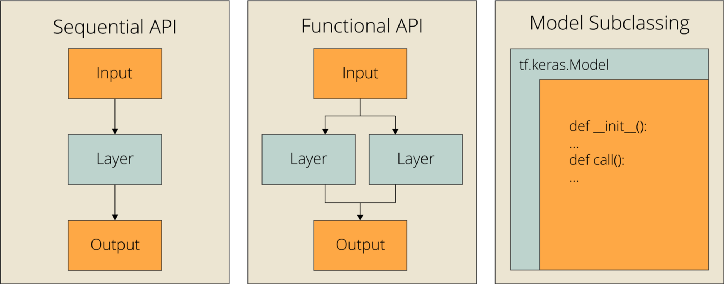

1. 서브클래싱 API로 구현한 선형 회귀

앞서 ( https://wikidocs.net/111472 ) 에서 Sequential API로 구현했던 선형 회귀를 Subclassing API로 구현한다면 다음과 같습니다.

In [1]:
import tensorflow as tf

In [2]:
class LinearRegression(tf.keras.Model):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear_layer = tf.keras.layers.Dense(1, input_dim = 1, activation  = 'linear')

    def call(self, x):
        y_pred = self.linear_layer(x)

        return y_pred

model = LinearRegression()

In [3]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [6]:
sgd = tf.keras.optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer = sgd, loss = 'mse', metrics = ['mse'])
model.fit(X, y, epochs = 300)

Epoch 1/300


ValueError: ignored

In [7]:
import tensorflow as tf

class LinearRegression(tf.keras.Model):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear_layer = tf.keras.layers.Dense(1, input_shape=(1,), activation='linear')

    def call(self, x):
        y_pred = self.linear_layer(x)
        return y_pred

model = LinearRegression()

X = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # Study hours
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]  # Corresponding grades

X = tf.constant(X, dtype=tf.float32)  # Convert to a TensorFlow tensor
y = tf.constant(y, dtype=tf.float32)  # Convert to a TensorFlow tensor

sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=300)


Epoch 1/300


ValueError: ignored

In [8]:
import tensorflow as tf

class LinearRegression(tf.keras.Model):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear_layer = tf.keras.layers.Dense(1, input_shape=(1,), activation='linear')

    def call(self, x):
        x = tf.expand_dims(x, axis=-1)  # Expand dimensions to match (batch_size, input_dim)
        y_pred = self.linear_layer(x)
        return y_pred

model = LinearRegression()

X = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # Study hours
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]  # Corresponding grades

X = tf.constant(X, dtype=tf.float32)  # Convert to a TensorFlow tensor
y = tf.constant(y, dtype=tf.float32)  # Convert to a TensorFlow tensor

sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=300)


Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 4540.5786 - mse: 4540.5786
Epoch 2/300
1/1 [==============================] - 0s 36ms/step - loss: 559.8156 - mse: 559.8156
Epoch 3/300
1/1 [==============================] - 0s 13ms/step - loss: 70.0108 - mse: 70.0108
Epoch 4/300
1/1 [==============================] - 0s 22ms/step - loss: 9.7423 - mse: 9.7423
Epoch 5/300
1/1 [==============================] - 0s 18ms/step - loss: 2.3251 - mse: 2.3251
Epoch 6/300
1/1 [==============================] - 0s 17ms/step - loss: 1.4109 - mse: 1.4109
Epoch 7/300
1/1 [==============================] - 0s 18ms/step - loss: 1.2968 - mse: 1.2968
Epoch 8/300
1/1 [==============================] - 0s 25ms/step - loss: 1.2812 - mse: 1.2812
Epoch 9/300
1/1 [==============================] - 0s 15ms/step - loss: 1.2777 - mse: 1.2777
Epoch 10/300
1/1 [==============================] - 0s 25ms/step - loss: 1.2757 - mse: 1.2757
Epoch 11/300
1/1 [==============================] - 0s 29ms

클래스(class) 형태의 모델은 tf.keras.Model을 상속받습니다. 그리고 init()에서 모델의 구조와 동적을 정의하는 생성자를 정의합니다. 이는 파이썬에서 객체가 갖는 속성값을 초기화하는 역할로, 객체가 생성될 때 자동으호 호출됩니다. super() 함수를 부르면 여기서 만든 클래스는 tf.keras.Model 클래스의 속성들을 가지고 초기화 됩니다. call() 함수는 모델이 데이터를 입력받아 예측값을 리턴하는 포워드(forward) 연산을 진행시키는 함수입니다.

H(x) 식에 입력 x
로부터 예측된 y
를 얻는 것을 forward 연산이라고 합니다.

2. 언제 서브클래싱 API를 써야 할까?

Sequential API는 간단한 모델을 구현하기에 적합합니다. Functional API로는 Sequential API로 구현할 수 없는 복잡한 모델들을 구현가능합니다. 그런데 Subclassing API로는 Functional API가 구현할 수 없는 모델들조차 구현할 수 있는 경우가 있습니다. Functional API는 기본적으로 딥 러닝 모델을 DAG(directed acyclic graph)로 취급합니다. 실제로 대부분의 딥 러닝 모델이 이에 속하기는 하지만, 항상 그렇지는 않습니다. 예를 들어서 재귀 네트워크나 트리 RNN은 이 가정을 따르지 않으며 Functional API에서 구현할 수 없습니다.

이를 반대로 해석하면 대부분의 딥 러닝 모델은 Functional API 수준에서도 전부 구현이 가능하다는 의미이기도 합니다. 그래서 Subclassing API는 밑바닥부터 새로운 수준의 아키텍처를 구현해야 하는 실험적 연구를 하는 연구자들에게 적합합니다.

3. 세 가지 구현 방식 비교.

1) Sequential API\
장점 : 단순하게 층을 쌓는 방식으로 쉽고 사용하기가 간단합니다.
단점 : 다수의 입력(multi-input), 다수의 출력(multi-output)을 가진 모델 또는 층 간의 연결(concatenate)이나 덧셈(Add)과 같은 연산을 하는 모델을 구현하기에는 적합하지 않습니다. 이런 모델들의 구현은 Functional API를 사용해야 합니다.

2) Functional API\
장점 : Sequential API로는 구현하기 어려운 복잡한 모델들을 구현할 수 있습니다.
단점 : 입력의 크기(shape)를 명시한 입력층(Input layer)을 모델의 앞단에 정의해주어야 합니다. 가령, 아래의 코드를 봅시다.

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers, Model

In [12]:
# 선형 회귀 구현 코드의 일부 발췌

inputs = Input(shape = (1,)) # <-- 해당 부분
output = Dense(1, activation = 'linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(lr = 0.01)

linear_model.compile(optimizer = sgd, loss = 'mse', metrics = ['mse'])
linear_model.fit(X, y, epochs = 300)

Epoch 1/300
1/1 [==============================] - 1s 550ms/step - loss: 3010.1294 - mse: 3010.1294
Epoch 2/300
1/1 [==============================] - 0s 11ms/step - loss: 371.3944 - mse: 371.3944
Epoch 3/300
1/1 [==============================] - 0s 11ms/step - loss: 46.7171 - mse: 46.7171
Epoch 4/300
1/1 [==============================] - 0s 10ms/step - loss: 6.7672 - mse: 6.7672
Epoch 5/300
1/1 [==============================] - 0s 9ms/step - loss: 1.8510 - mse: 1.8510
Epoch 6/300
1/1 [==============================] - 0s 15ms/step - loss: 1.2453 - mse: 1.2453
Epoch 7/300
1/1 [==============================] - 0s 10ms/step - loss: 1.1701 - mse: 1.1701
Epoch 8/300
1/1 [==============================] - 0s 9ms/step - loss: 1.1601 - mse: 1.1601
Epoch 9/300
1/1 [==============================] - 0s 8ms/step - loss: 1.1582 - mse: 1.1582
Epoch 10/300
1/1 [==============================] - 0s 12ms/step - loss: 1.1572 - mse: 1.1572
Epoch 11/300
1/1 [==============================] - 0s 11ms

3) Subclassing API

장점 : Functional API로도 구현할 수 없는 모델들조차 구현이 가능합니다.\
단점 : 객체 지향 프로그래밍(Object-oriented programming)에 익숙해야 하므로 코드 사용이 가장 까다롭습니다.